In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

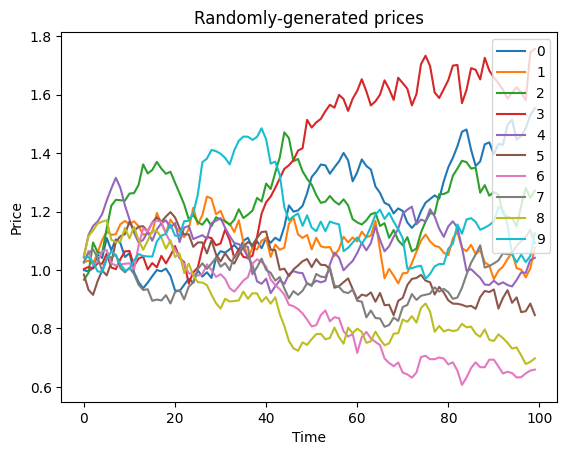

In [4]:
returns = pd.DataFrame(np.random.normal(1.0, 0.03, (100, 10)))
prices = returns.cumprod()
prices.plot()
plt.title('Randomly-generated prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc=0);

#### pandas Data Structure

A pandas Series is a 1-dimensional array with labels that can contain any data type. We primarly use them for handling time series data.

In [6]:
s = pd.Series([1, 2, np.nan, 4, 5])
print(s)

0    1.0
1    2.0
2    NaN
3    4.0
4    5.0
dtype: float64


In [7]:
print(s.name)

None


In [8]:
s.name = "Toy Series"
print(s.name)

Toy Series


In [9]:
print(s.index)

RangeIndex(start=0, stop=5, step=1)


In [10]:
new_index = pd.date_range("2016-01-01", periods=len(s), freq="D")
print(new_index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [11]:
s.index = new_index
print(s.index)

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05'],
              dtype='datetime64[ns]', freq='D')


In [12]:
print(s)

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64


##### Accessing Series Elements

In [13]:
print("First element of the Series:", s.iloc[0])
print("Last element of the Series:", s.iloc[len(s)-1])

First element of the Series: 1.0
Last element of the Series: 5.0


In [14]:
s.iloc[:2]

2016-01-01    1.0
2016-01-02    2.0
Freq: D, Name: Toy Series, dtype: float64

In [17]:
start = 0
end = len(s)
step = 1

s.iloc[start:end:step]

2016-01-01    1.0
2016-01-02    2.0
2016-01-03    NaN
2016-01-04    4.0
2016-01-05    5.0
Freq: D, Name: Toy Series, dtype: float64

In [19]:
s.iloc[::-1]

2016-01-05    5.0
2016-01-04    4.0
2016-01-03    NaN
2016-01-02    2.0
2016-01-01    1.0
Freq: -1D, Name: Toy Series, dtype: float64